
The code below should load the "Affairs" dataset from R's dataset repository. It's data from a survey on extra-marital affairs conducted by Psychology Today in 1969.
 
Before you start, read more about the dataset and metadata (e.g. code-label mappings) at https://vincentarelbundock.github.io/Rdatasets/doc/AER/Affairs.html
 
Be wary of data that appear numerical but are actually categorical.

In [ ]:
import pandas as pd
import seaborn as sns

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

affairs = pd.read_csv(url)

affairs.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


## Task 1a.

Using pandas and the affairs dataframe created above (you might need to run the cell again)
*   Create a table that shows the count of female participants in the sample, grouped by how many years they've been married
*   Relabel the yearsmarried groups in the table using the metadata described above
*   Put your code in the cell below.

In [ ]:
affairs['yearsmarried'] = pd.Categorical(affairs.yearsmarried)
affairs['yearsmarried'] = affairs['yearsmarried'].cat.rename_categories({0.125: '3 months or less', 0.417: '4-6 months', 0.75: '6 months-1 year', 1.5: '1-2 years', 4.00:'3-5 years', 7.00: '6-8 years', 10.00: '9-11 years', 15: '12 or more years'})
affairs.head()
# create subset from main dataset 
affairs_subset = affairs[['gender', 'yearsmarried']].copy()
# remove rows labelled 'male'
affairs_subset = affairs_subset[affairs_subset["gender"] != "male"]
print(affairs_subset.groupby('yearsmarried').size())
# create a dataframe of results
female_years1 = pd.DataFrame({
    'Years Married' : ['3 months or less', '4-6 months', '6 months-1 year', '1-2 years', '3-5 years', '6-8 years','9-11 years','12 or more years'],
    'Number of Females': [5, 6, 21, 53, 41, 49, 36, 104]
})
# display the table

female_years1

yearsmarried
3 months or less      5
4-6 months            6
6 months-1 year      21
1-2 years            53
3-5 years            41
6-8 years            49
9-11 years           36
12 or more years    104
dtype: int64


,Years Married,Number of Females
0,3 months or less,5
1,4-6 months,6
2,6 months-1 year,21
3,1-2 years,53
4,3-5 years,41
5,6-8 years,49
6,9-11 years,36
7,12 or more years,104


## Task 1b.
In this text box (double click to edit), note anything interesting about the distribution of female participants over the "yearsmarried" groups that you spotted in the previous task.

If you created visualisations to show the numbers of affairs reported by these groups
, is there anything you'd want to keep in mind when interpreting them?



---

*Answer:*

33.02% of female participants had been married for 12 or more years. Thus, if the number of affairs turns out to be highest for this group of female participants, there is a sample bias since the majority of females in the study were married for 12 or more years. Therefore, the data would be more reliable if there were an equal amount of female participants in each class for the variable of 'years married' - because we would have a better indication of whether there is correlation between years of marriage and the number of extra-marital affairs. 

The interval classes in the 'years married' variable are also not equal. For example, '12 or more years' could mean anything from 13 years of marriage to 50 years (this may be why there is the largest number of female participants for this class). Whereas for '3 months or less' the time frame is very small, hence why there is a very small number, 5, of female participants who make up this class. Thus, any visualisations may be limited not just because of the sample bias but also the fact that some classes are more broad than others. We would gain more a bit more insight into the relationship between years married and affairs if there were more classes - such as '12-20 years', '21-30 years' and '30-50 years'. Because then we could answer questions such as 'are people who have had a golden anniversary with their spouses likely or unlikely to have had extra-marital affairs?'



## Task 2a.
In the code box below this text, use seaborn to create a categorical bar plot which shows the proportion of participants who have had affairs, by whether participants have children (on the x axis) and their gender (as a legend). Leave the default formatting and labels produced by seaborn.

hint: you might need to create a new variable or column which only records whether or not participants say they have had an affair

https://seaborn.pydata.org/generated/seaborn.catplot.html)

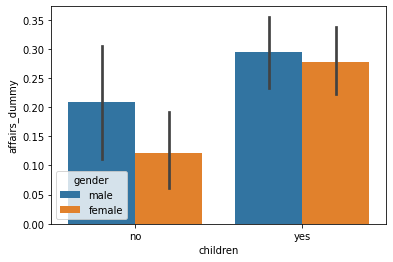

In [ ]:
import matplotlib.pyplot as plt
# create dummy variable
affairs_dummy = []
for row in affairs['affairs']:
    if row > 0:
        affairs_dummy.append(1)
    else:
        affairs_dummy.append(0)
affairs['affairs_dummy'] = affairs_dummy
# create subset table with children, gender, affairs 
affairs_subset1 = affairs[['gender', 'children','affairs','affairs_dummy']].copy()
affairs_subset1
# use seaborn to create barplot 
g = sns.barplot(x = 'children', y = 'affairs_dummy', hue='gender', data = affairs_subset1)

The categorical plot above shows us that:
- roughly 0.21 of male participants who did not have children had affairs. 
- roughly 0.125 of female participants who did not have children had affairs
- Almost 0.30 of male participants who had children also admitted to having affairs
- roughly 0.28 of female participants who had children had affairs 

Therefore:
- Males in general in this study reported to have more extra-marital affairs than females
- Participants who had children reported to have more extra-marital affairs than participants without children
- The gap between males and females having affairs was smaller for participants who had children. Thus, the findings implicate that the probability of females having extra-marital affairs is increased if they are parents.

## Task 2b.
In the code box below this text, create a similar bar plot with some changes:



*   Relabel the axes and legend to make sense to someone who doesn't know the data
*   Add a chart title
*   Change the colour of the bars to yellow and purple




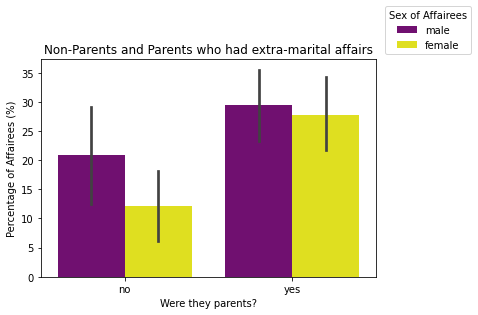

In [ ]:
import seaborn as sns
import matplotlib.ticker as mtick
# change proportion values to percentages by multiplying by 100
dummy = (affairs_subset1['affairs_dummy'])*100
# define colour palette as yellow and purple
clrs = ['purple','yellow']
# create barplot again
g = sns.barplot(x = 'children', y = dummy, hue='gender', palette=clrs, data = affairs_subset1).set(title='Non-Parents and Parents who had extra-marital affairs')
# relabel axes
plt.xlabel("Were they parents?")
plt.ylabel("Percentage of Affairees (%)")
# label x axis bars 
#plt.xticks()
plt.legend(bbox_to_anchor=(1.30, 1), loc='lower right', title='Sex of Affairees')
plt.show()

## Task 3.

Freestyle, analyst's choice! Tell me something about the data. Create *no more than two* visualisations in the code box below, and tell me about the pattern of data you see and what it might mean. You do not need to use inferential statistics, or do anything fancy. This task is more concerned with your ability to find and tell a story from data.


In [ ]:
# recode age from numerical to nominal/categorical
age_category = pd.cut(affairs.age,bins=[0,30,40,55,99],labels=['Under 30','30-40 years old','41-55 years old','Older than 55'])
affairs.insert(3,'Age_Group',age_category)
print(affairs.groupby('Age_Group').size())

Age_Group
Under 30           276
30-40 years old    203
41-55 years old    100
Older than 55       22
dtype: int64


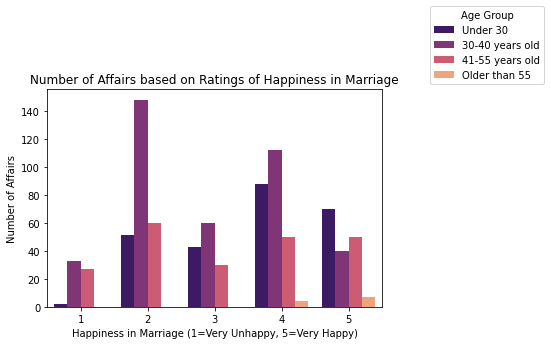

In [ ]:
affairs_subset = affairs.copy()
affairs_subset = affairs_subset[affairs_subset["affairs"] != 0]
sub = affairs_subset.groupby(['rating','Age_Group'])['affairs'].sum().reset_index()
sns.barplot(data=sub, x="rating", y="affairs", palette='magma', hue="Age_Group").set(title='Number of Affairs based on Ratings of Happiness in Marriage')
plt.xlabel("Happiness in Marriage (1=Very Unhappy, 5=Very Happy)")
plt.ylabel("Number of Affairs")
plt.legend(bbox_to_anchor=(1.50, 1), loc='lower right',title="Age Group")

The categorical bar plot above shows the number of affairs based on ratings of happiness in participants' marriages. The bars are also divided based on the age group. 
- participants who rated their happiness as 1, indicating that they were very unhappy, had the lowest number of affairs.
- This may be because those who were very unhappy would resort to leaving the marriage instead of having an extra-marital affair. 
- But those who were just 'unhappy' would stay in the marriage but have an affair. Perhaps this is why the number of affairs skyrocketed due for the happiness rating of 2. 
- more affairs prevalent for those who rated their happiness as 4 or 5 compared to 1 and 3. 
- 30-40 year olds almost consistently had the most affairs, with the exception of the rating level of 5 - where under 30s were the most likely.
- 40-51 year olds reported less affairs though this may also be due to sample bias

Overall, the findings go against the hypothesis that unhappiness in marriage causes extra-marital affairs. If we were to use inferential statistics there would probably be weak correlation. 

In [ ]:
affairs.dtypes

Unnamed: 0         int64
affairs            int64
gender             int64
age              float64
yearsmarried     float64
children           int64
religiousness      int64
education          int64
occupation         int64
rating             int64
dtype: object

education
Grade School              7
High School Graduate     44
Some College            154
College Graduate        115
Some Graduate Work       89
Masters Degree          112
PhD/M.D. Degree          80
dtype: int64


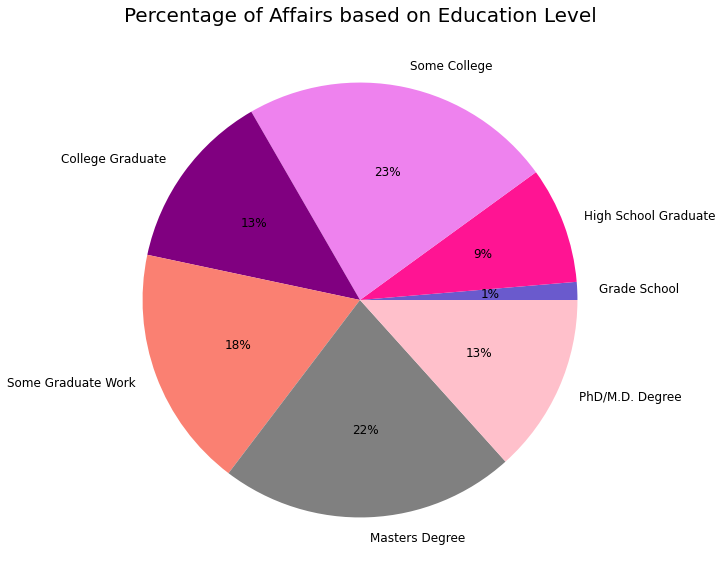

In [ ]:
affairs['education'] = pd.Categorical(affairs.education)
affairs['education'] = affairs['education'].cat.rename_categories({9:"Grade School", 12:"High School Graduate", 14:"Some College", 16:"College Graduate", 17:"Some Graduate Work",18:'Masters Degree', 20:'PhD/M.D. Degree'})
affairs_subset = affairs.copy()
print(affairs.groupby('education').size())
import numpy as np
def perc_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df = affairs_subset[affairs_subset["affairs_dummy"] != 0]
#df = df.groupby(['education'])['affairs_dummy'].sum().reset_index()
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 10))
df.groupby('education').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 12},
                                  colors=['slateblue','deeppink','violet','purple','salmon','gray','pink'])
ax1.set_ylabel('')
plt.title('Percentage of Affairs based on Education Level', fontsize='20')
plt.show()

*Answer:*

The pie chart shows the percentage of affairs based on education level. 
- those with less education, high school graduates or only grade school education, reported less affairs than people with more education
- but as the table above shows, this relationship seems to be based on the sample sizes for each class. 
- suggests no statistical significance between the education level and number of affairs

# Extra Coding 

---

(Since I was still curious about the data)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

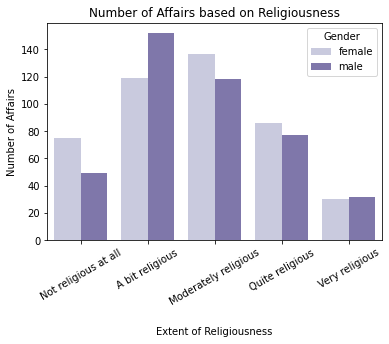

In [ ]:
from matplotlib import pyplot as plt
affairs['religiousness'] = pd.Categorical(affairs.religiousness)
affairs["religiousness"] = affairs['religiousness'].cat.rename_categories({1:"Not religious at all", 2:"A bit religious", 3:"Moderately religious", 4:"Quite religious", 5:"Very religious"})
affairs_subset = affairs.copy()
affairs_subset = affairs_subset[affairs_subset["affairs"] != 0]
sub2 = affairs_subset.groupby(['religiousness','gender'])['affairs'].sum().reset_index()
g = sns.barplot(data=sub2, x='religiousness', y='affairs', palette='Purples', hue='gender').set(title='Number of Affairs based on Religiousness')
plt.xlabel("Extent of Religiousness",labelpad=20)
plt.ylabel("Number of Affairs")
plt.legend(title='Gender')
plt.xticks(rotation = 30)

The categorical barplot here shows the number of affairs based on the extent of religiousness. 

- Those who described themselves as 'very religious' had the lowest number of reported extra-marital affairs.
- whereas those who described themselves as 'a bit religious' or 'moderately religious' had the highest number of affairs.
- when grouped by extent of religousness, males did not always report more affairs than females. this goes against the stereotype that religous women tend to be more pious and adherent to conservative ideas about marriage than men

# More Coding work


---

(Since I also had extra time)

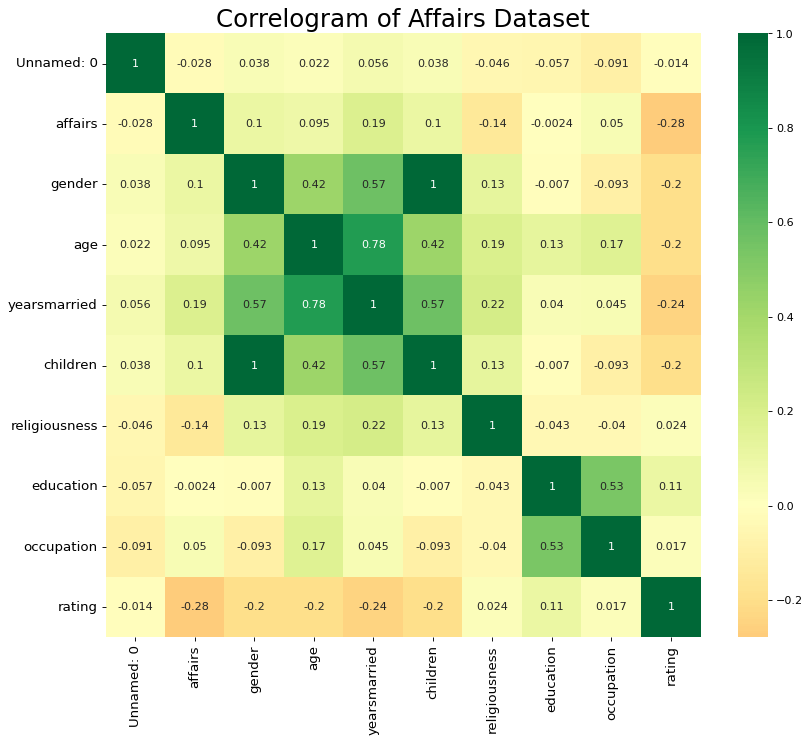

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Get dataset again and create numeric variables for gender and children
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

affairs = pd.read_csv(url)
label_binarizer = LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform(affairs['children'])
label_binarizer_output1 = label_binarizer.fit_transform(affairs['gender'])
affairs['children'] = label_binarizer_output
affairs['gender'] = label_binarizer_output
# correlation matrices 
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(affairs.corr(), xticklabels=affairs.corr().columns, yticklabels=affairs.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Affairs Dataset', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The correlogram summarises the correlation coefficients for the data. This grid shows us the extent of correlation between each variable. The closer the colour is to green, the higher the positive correlation. The closer the colour is to amber, the higher the negative correlation. To focus on correlates for affairs we see:

- There is weak positive correlation (0.19) between years married and extra-marital affairs. 
- There is weak negative correlation (-0.14 and 0.28) for religiousness and happiness ratings as predictors of extra-marital affairs.
- There is very weak negative correlation (0.0024) for education level and affairs and very weak positive correlation 0.05 for occupation
- The weak positive correlation coefficients of about 0.1 are notable for children, age and gender. 
- Age correlation coefficient makes sense due to its correlation with years married being high.

Text(0, 0.5, 'Number of Affairs')

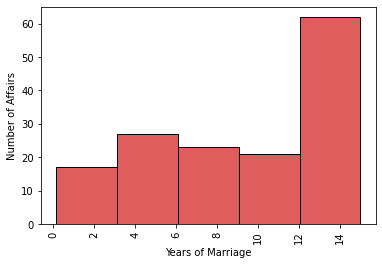

In [ ]:
# Historgram of number of affairs per years married
subset = affairs[affairs["affairs"] != 0]
sns.histplot(data=subset, x='yearsmarried', color=('tab:red'), bins=5)
plt.xticks(rotation = 90)
plt.xlabel('Years of Marriage')
plt.ylabel('Number of Affairs')

The histogram above shows that the highest number of affairs was indeed higher for those who reported having been married for 12 or more years. 

This reinforces the finding the strongest (though still weak) positive correlation coefficient found for 'yearsmarried'

A t-test or logistic regression model would be good to further establish the relationship between years of marriage and extra-marital affairs.

Results may also be due to sample size, as we saw in task 1 that the class size was bigger for those who had been married for 12 or more years.